<center> <h1>PREDICCIÓN DEL SUEÑO</h1> </center>
<center> <h3>VISUALIZACIÓN</h3> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza</h4> </center>

En este notebook se realiza la visualización de los datos de un sujeto y su representación gráfica.


In [1]:
# IMPORTAR MÓDULOS
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Los datos están distribuidos en 4 carpetas:

    1. Labels
    2. Heart_rate
    3. Steps
    4. Motion

En la siguiente celda de código se recorren los 4 folders y se guardan los nombres de los ficheros de texto en listas individuales para su posterior utilización.

In [2]:
# LISTAS CON LOS NOMBRES DE TODOS LOS ARCHIVOS .txt
sujetos_sueño=[]
for file in (os.listdir("labels")):
    sujetos_sueño.append(os.path.join("labels",file))
    sujetos_sueño=sorted(sujetos_sueño)
    
sujetos_frecuencia_cardiaca=[]
for file in os.listdir("heart_rate"):
    sujetos_frecuencia_cardiaca.append(os.path.join("heart_rate",file))

sujetos_pasos=[]
for file in os.listdir("steps"):
    sujetos_pasos.append(os.path.join("steps",file))

sujetos_movimiento=[]
for file in os.listdir("motion"):
    sujetos_movimiento.append(os.path.join("motion",file))

In [3]:
print(len(sujetos_sueño),len(sujetos_frecuencia_cardiaca),
      len(sujetos_pasos),len(sujetos_movimiento))

31 31 31 31


Cada carpeta cuenta con 31 ficheros de texto correspondientes a las señales fisiológicas de los 31 sujetos del estudio. En el repositorio de Physionet se indica el contenido de cada carpeta de datos.

**Seleccionar el número de sujeto a visualizar:**

In [4]:
n=1

In [5]:
print('\n',sujetos_sueño[n],'\n',sujetos_frecuencia_cardiaca[n],'\n',
      sujetos_pasos[n],'\n',sujetos_movimiento[n])


 labels\1360686_labeled_sleep.txt 
 heart_rate\1360686_heartrate.txt 
 steps\1360686_steps.txt 
 motion\1360686_acceleration.txt


### 1. LABELS (Sueño)

In [6]:
labels=pd.read_csv(sujetos_sueño[n], delimiter=' ')
labels.columns=["Tiempo","Fase_sueño"]
labels.sample(10)

,Tiempo,Fase_sueño
445,13380,5
130,3930,3
565,16980,2
750,22530,2
707,21240,2
237,7140,3
812,24390,5
546,16410,2
630,18930,5
203,6120,3


La característica labels tiene unas dimensiones de: 967 x 2 

Número de valores diferentes que hay para Fase_sueño: 6 

Número de veces que se toma cada valor de Fases_sueño:
 2    427
 5    208
 3    163
 0    117
 1     33
-1     19
Name: Fase_sueño, dtype: int64 

Descriptores estadísticos de Fases_sueño:
count    967.00
mean       2.48
std        1.60
min       -1.00
25%        2.00
50%        2.00
75%        3.00
max        5.00
Name: Fase_sueño, dtype: float64 

Número de valores Null: 0 

Número de valores NaN: 0 



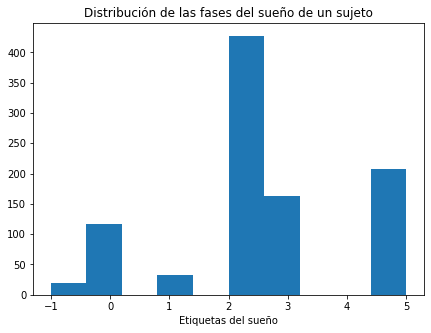

In [7]:
rows, columns = labels.shape
print ('La característica labels tiene unas dimensiones de:', rows,'x',columns,'\n')

print('Número de valores diferentes que hay para Fase_sueño:',labels['Fase_sueño'].nunique(),'\n')

print('Número de veces que se toma cada valor de Fases_sueño:')
print(labels["Fase_sueño"].value_counts(),'\n')

print('Descriptores estadísticos de Fases_sueño:')
print(labels["Fase_sueño"].describe().round(2),'\n')

print('Número de valores Null:',labels["Fase_sueño"].isnull().sum(),'\n')

print('Número de valores NaN:',labels["Fase_sueño"].isna().sum(),'\n')

plt.figure(figsize=(7, 5))
plt.title('Distribución de las fases del sueño de un sujeto')
plt.xlabel("Etiquetas del sueño")
plt.hist(labels['Fase_sueño'])
plt.show()

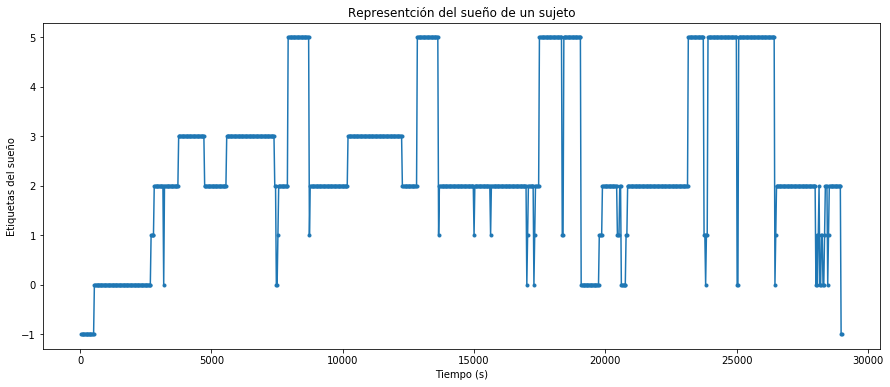

In [8]:
x=labels["Tiempo"]
y=labels["Fase_sueño"]

plt.figure(figsize=(15,6))
plt.plot(x,y, marker='.')
plt.title("Representción del sueño de un sujeto")
plt.xlabel("Tiempo (s)")
plt.ylabel("Etiquetas del sueño")
plt.show()

### 2. HEART_RATE (Frecuencia cardíaca)

Se ha decidido trabajar sólo con la información de frecuencia cardíaca con **t > 0s** para simplificar el desarrollo del proyecto.

In [9]:
heart_rate=pd.read_csv(sujetos_frecuencia_cardiaca[n])
heart_rate.columns=["Tiempo","Frec_card"]
heart_rate=heart_rate[heart_rate["Tiempo"]>0]
heart_rate.sample(10)

,Tiempo,Frec_card
2718,7195.76046,70
2959,8447.76049,76
6477,26775.76867,71
1739,2089.75728,59
6480,26790.76864,77
4946,18800.75223,70
3487,11193.76708,73
2930,8295.76046,76
5786,23193.75333,68
2838,7820.76049,76


La característica heart_rate tiene unas dimensiones de: 5632 x 2 

Número de valores diferentes que hay de Frec_card: 51 

Descriptores estadísticos de Frec_card:
count    5632.00
mean       69.61
std         6.18
min        55.00
25%        65.00
50%        70.00
75%        73.00
max       119.00
Name: Frec_card, dtype: float64 

Número de valores Null: 0 

Número de valores NaN: 0 



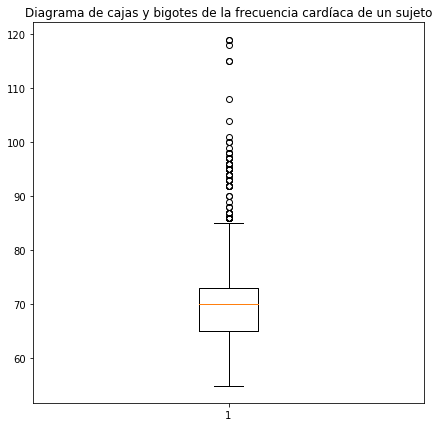

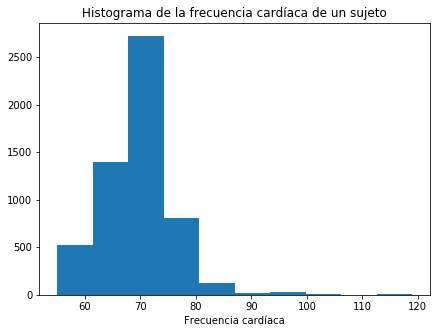

In [10]:
rows, columns = heart_rate.shape
print ('La característica heart_rate tiene unas dimensiones de:', rows,'x',columns,'\n')

print('Número de valores diferentes que hay de Frec_card:', heart_rate['Frec_card'].nunique(),'\n')

print('Descriptores estadísticos de Frec_card:')
print(heart_rate["Frec_card"].describe().round(2),'\n')

print('Número de valores Null:', heart_rate["Frec_card"].isnull().sum(),'\n')

print('Número de valores NaN:', heart_rate["Frec_card"].isna().sum(),'\n')

plt.figure(figsize=(7, 7))
plt.title('Diagrama de cajas y bigotes de la frecuencia cardíaca de un sujeto')
plt.boxplot(heart_rate['Frec_card'])
plt.show()

plt.figure(figsize=(7, 5))
plt.title('Histograma de la frecuencia cardíaca de un sujeto')
plt.xlabel("Frecuencia cardíaca")
plt.hist(heart_rate['Frec_card'])
plt.show()

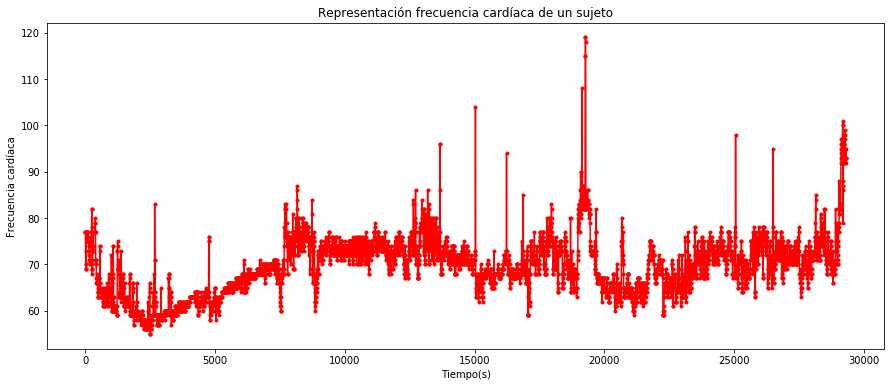

In [18]:
x=heart_rate['Tiempo']
y=heart_rate['Frec_card']

plt.figure(figsize=(15,6))
plt.plot(x,y, marker='.',color="r")
plt.title("Representación frecuencia cardíaca de un sujeto")
plt.xlabel("Tiempo(s)")
plt.ylabel("Frecuencia cardíaca")
plt.show()

### 3. STEPS (Pasos)

En este caso, para esta señal no se descartan los valores de t < 0s, debido a que con ellos se construirá un 'proxy de clock' para simular el horario de sueño de cada sujeto.

In [12]:
steps=pd.read_csv(sujetos_pasos[n])
steps.columns=["Tiempo","Pasos"]
steps.sample(10)

,Tiempo,Pasos
1029,13371,0
435,-343029,0
27,-587829,0
281,-435429,21
96,-546429,0
135,-523029,0
867,-83829,0
393,-368229,0
271,-441429,26
536,-282429,35


In [13]:
rows, columns = steps.shape
print ('La característica steps tiene unas dimensiones de:', rows,'x',columns,'\n')

print('Número de valores Null:',steps['Pasos'].isnull().sum(),'\n')

print('Número de valores NaN:',steps['Pasos'].isna().sum(),'\n')

La característica steps tiene unas dimensiones de: 1050 x 2 

Número de valores Null: 0 

Número de valores NaN: 0 



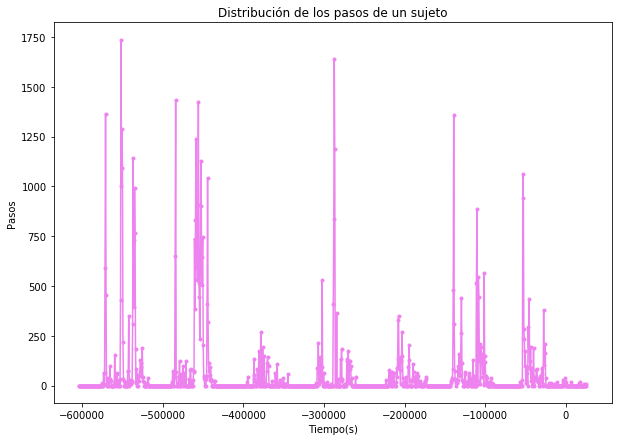

In [22]:
x=steps['Tiempo']
y=steps['Pasos']

plt.figure(figsize=(10,7))
plt.plot(x,y, marker='.',color="violet")
plt.title("Distribución de los pasos de un sujeto")
plt.xlabel("Tiempo(s)")
plt.ylabel("Pasos")
plt.show()

Se pueden observar 'grupos' de pasos. Estas tendencias están relacionadas con el día y la noche. Por la noche, el contador de pasos está a 0 y por el día el número crece y decrece.

### 4. MOTION (Movimiento o aceleración)

Se ha decidido trabajar sólo con la información de aceleración con **t > 0s** para simplificar el desarrollo del proyecto.

In [15]:
motion=pd.read_csv(sujetos_movimiento[11], delimiter=' ')
motion.columns=["Tiempo","Ac_x","Ac_y","Ac_z"]
motion=motion[motion['Tiempo']>0]
motion.sample(10)

,Tiempo,Ac_x,Ac_y,Ac_z
823130,13488.719928,-0.543762,-0.637375,0.543045
92080,697.279827,-0.327301,0.349320,-0.869659
1281056,21502.231355,-0.383331,-0.728867,0.558456
1281004,21501.321555,-0.384308,-0.729355,0.556976
526245,8295.387650,-0.323013,0.300278,-0.889450
1222914,20484.661016,-0.489868,-0.709000,0.498856
1199855,20081.112471,-0.488892,-0.709976,0.499863
1189784,19904.859146,-0.491348,-0.710465,0.499817
494618,7741.739148,-0.324036,0.299789,-0.887009
1456801,24576.388327,-0.138748,-0.002655,-0.983383


La característica motion tiene unas dimensiones de: 1697809 x 4 

Número de valores diferentes que hay:
Tiempo    1697809
Ac_x        46153
Ac_y        47445
Ac_z        60458
dtype: int64 

Descriptores estadísticos de Motion:
           Tiempo        Ac_x        Ac_y        Ac_z
count  1697809.00  1697809.00  1697809.00  1697809.00
mean     14852.97       -0.35       -0.22       -0.36
std       8575.23        0.17        0.47        0.66
min          0.01       -3.13       -2.88       -3.59
25%       7427.13       -0.47       -0.70       -0.89
50%      14852.83       -0.34       -0.18       -0.82
75%      22280.79       -0.29        0.28        0.46
max      29708.55        2.42        3.75        2.47 

Número de valores Null:
Tiempo    0
Ac_x      0
Ac_y      0
Ac_z      0
dtype: int64 

Número de valores NaN:
Tiempo    0
Ac_x      0
Ac_y      0
Ac_z      0
dtype: int64 



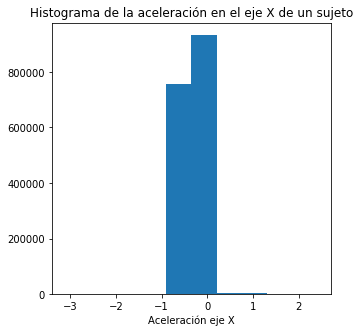

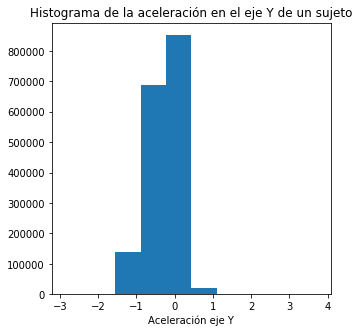

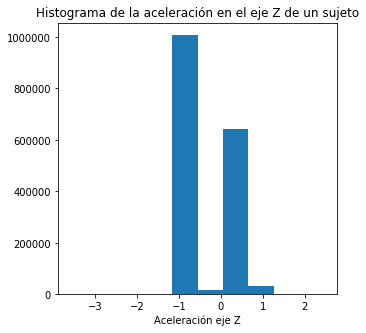

In [16]:
rows, columns = motion.shape
print ('La característica motion tiene unas dimensiones de:', rows,'x',columns,'\n')

print('Número de valores diferentes que hay:')
print(motion.nunique(),'\n')

print('Descriptores estadísticos de Motion:')
print(motion.describe().round(2),'\n')

print('Número de valores Null:')
print(motion.isnull().sum(),'\n')

print('Número de valores NaN:')
print(motion.isna().sum(),'\n')

plt.figure(figsize=(5, 5))
plt.title('Histograma de la aceleración en el eje X de un sujeto')
plt.xlabel("Aceleración eje X")
plt.hist(motion['Ac_x'],bins=10)
plt.show()

plt.figure(figsize=(5, 5))
plt.title('Histograma de la aceleración en el eje Y de un sujeto')
plt.xlabel("Aceleración eje Y")
plt.hist(motion['Ac_y'],bins=10)
plt.show()

plt.figure(figsize=(5, 5))
plt.title('Histograma de la aceleración en el eje Z de un sujeto')
plt.xlabel("Aceleración eje Z")
plt.hist(motion['Ac_z'],bins=10)
plt.show()

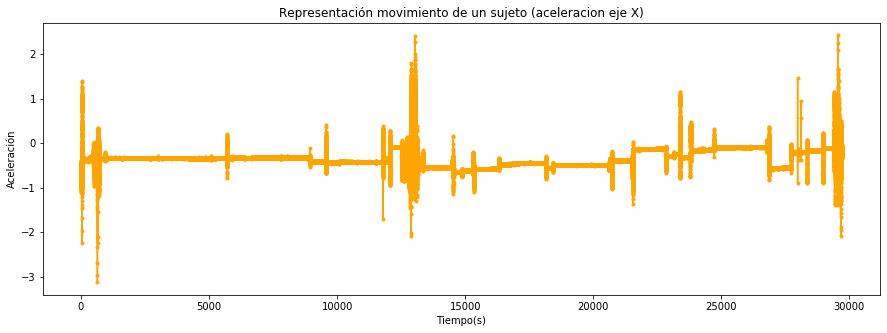

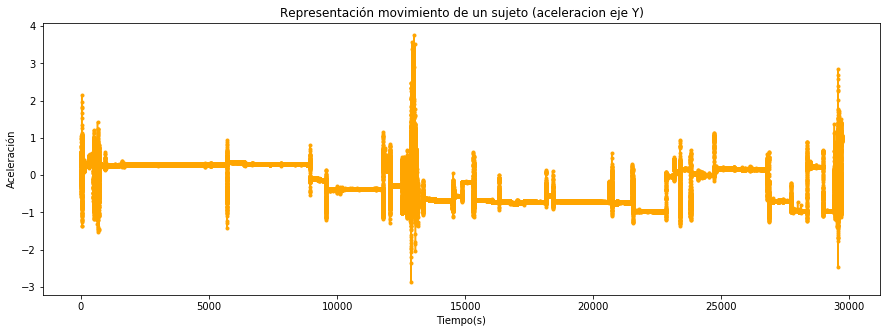

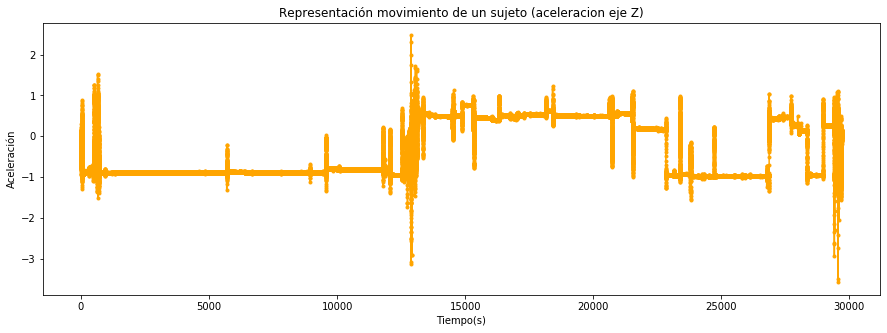

In [25]:
t=motion['Tiempo']
x=motion['Ac_x']
y=motion['Ac_y']
z=motion['Ac_z']

plt.figure(figsize=(15,5))
plt.plot(t,x, marker='.',color="orange")
plt.title("Representación movimiento de un sujeto (aceleracion eje X)")
plt.xlabel("Tiempo(s)")
plt.ylabel("Aceleración")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(t,y, marker='.',color="orange")
plt.title("Representación movimiento de un sujeto (aceleracion eje Y)")
plt.xlabel("Tiempo(s)")
plt.ylabel("Aceleración")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(t,z, marker='.',color="orange")
plt.title("Representación movimiento de un sujeto (aceleracion eje Z)")
plt.xlabel("Tiempo(s)")
plt.ylabel("Aceleración")
plt.show()